# Assignment 2: Getting data from Twitter API

For working on this assignment, the easiest way is to log into the [datahub.berkeley.edu](http://datahub.berkeley.edu). If you have a @berkeley.edu email address, you already have full access to the programming environment hosted on that site. 

## 1. Intro

Twitter collects a *lot* of data. Ranging from tweets themselves, to data about users, to data about likes and other interactions, Twitter basically records everything that happens on their website. Lucky for data scientists like ourselves, Twitter also shares that data with us! In this assignment, we're going to use Twitter's API to analyze retweet statistics, demographics, and some other data too! 

## 2. Importing Libraries

Other people are also interested in analyzing Twitter data, so there's been work done here already. That means other folks have developed useful collections of code — called libraries — which handle a lot of parsing and data management, so that we don't have to. Since these libraries are published online, we have access to all that hard work too! That means we can use code from those libraries to handle all the complicated Twitter models, so we only have to worry about the actual analysis (which is the fun part).

You don't need to worry too much about the code in the next cell. Its purpose is to install libraries that other people have written, so that we have access to them later on.

In [2]:
!pip install tweepy    # This halps us access Twitter data.
!pip install textblob  # This helps us parse text.
!pip install plotly    # This makes it easy to plot graphs.
!pip install nltk      # This is also to parse text.

  Using cached tweepy-3.5.0-py2.py3-none-any.whl
  Using cached requests_oauthlib-0.8.0-py2.py3-none-any.whl
  Using cached oauthlib-2.0.4.tar.gz
  Running setup.py bdist_wheel for oauthlib ... error
  Complete output from command /srv/app/venv/bin/python3.6 -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-jxhvf_5j/oauthlib/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/tmpsi27uyoupip-wheel- --python-tag cp36:
  usage: -c [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
     or: -c --help [cmd1 cmd2 ...]
     or: -c --help-commands
     or: -c cmd --help
  
  error: invalid command 'bdist_wheel'
  
  ----------------------------------------
  Failed building wheel for oauthlib
  Running setup.py clean for oauthlib
Failed to build oauthlib
  Running setup.py install for oauthlib ... done
  Using cached textblob-0.13.0-py2.py3-none-any.whl
  Using cached plotly-

## 3. Accessing the Data

### Question 1
Follow these instructions to get your keys:
To work on Twitter data, we'll first need two things: a Twitter account, and Twitter keys. Here are the steps to follow:

1. [Create a Twitter account](https://twitter.com).  You can use an existing account if you have one.
1. [Create a Twitter developer account](https://dev.twitter.com/resources/signup).  Attach it to your Twitter account.
1. Once you're logged into your developer account, [create an application for this assignment](https://apps.twitter.com/app/new).  You can call it whatever you want, and you can write any URL when it asks for a web site.
1. On the page for that application, find your Consumer Key and Consumer Secret. Don't lose these!
1. On the same page, create an Access Token. Record the resulting Access Token and Access Token Secret. Don't lose these either!

**Security concern:** DO NOT share your access keys with anyone. They can be used to manage your Twitter account without your permission.

Add your credentials in the cell below. Your program will use them to access Twitter data.

In [3]:
consumer_key = ""
consumer_secret = ""
access_key = ""
access_secret = ""

The next cell will authorize your program to request Twitter data, through the developer account you just set up.

In [4]:
import tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

**Note**: A lot of data scientists like Twitter data. As a result, you can only request data approximately once every 15 minutes to keep Twitter's servers from crashing due to too much activity. Use your requests wisely to avoid unnecessary waiting time.

### Question 2:
[Twitter API](https://dev.twitter.com/overview/api) can be used for retrieving different objects (e.g., tweets). List the other possible objects that can be retrieved by Twitter API.


**Answer:**
1. User
2. Entity
3. Place

Now that everything is set up, we can use [Twitter's search API](https://dev.twitter.com/rest/reference/get/search/tweets) to find the word "Berkeley". This will give us the same results as using [Twitter's online "search" page](https://twitter.com/search?q=berkeley).

In [5]:
results = tweepy.Cursor(api.search,   # `api.search` specifies we want to perform a search.
                        q='Berkeley', # `q` is the query, or the words we're searching for.
                        result_type='popular') # We'll prioritize more popular results first.

Now `results` is a long list of search results. Since it is actually pretty extensive, let's just take the first ten results. In the next cell we build up a list called `first_ten`, which contains just the first ten tweets we found in `results`.

In [44]:
first_ten = []                  # We start out with an empty list called `first_ten`.
for tweet in results.items(100): # Then, we'll iterate over the first 10 tweets in `results`...
    first_ten.append(tweet)     # And we'll add each of those tweets to `first_ten`.

Now lets have a peek at what the data looks like. 

In [45]:
print(first_ten)

[Status(_api=<tweepy.api.API object at 0x7ff48442a0f0>, _json={'created_at': 'Wed Sep 13 00:20:31 +0000 2017', 'id': 907760870071074818, 'id_str': '907760870071074818', 'text': 'More than $60K has been raised for a hot dog vendor after video of UC Berkeley cops seizing his money went viral:… https://t.co/qjJ3m8DoCJ', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/qjJ3m8DoCJ', 'expanded_url': 'https://twitter.com/i/web/status/907760870071074818', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [115, 138]}]}, 'metadata': {'result_type': 'popular', 'iso_language_code': 'en'}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 20097362, 'id_str': '20097362', 'name': 'NBC Bay Area', 'screen_name': 'nbcbayarea', 'lo

## 4. Exploring the Dataset

Twitter gives us a lot of information about each tweet, not just its text. You can read about all the details [here](https://dev.twitter.com/overview/api/tweets). Let's look at one tweet to get a sense of the information we have available. We can access just the first tweet in our list by indexing into it. Note, the first index in the list is actually 0, not 1, so we will actually say `first_ten[0]` to see the first tweet in our list of ten tweets.

In [46]:
print(first_ten[0]) # Try changing this to any number 0-9, to see other tweets in the list.

Status(_api=<tweepy.api.API object at 0x7ff48442a0f0>, _json={'created_at': 'Wed Sep 13 00:20:31 +0000 2017', 'id': 907760870071074818, 'id_str': '907760870071074818', 'text': 'More than $60K has been raised for a hot dog vendor after video of UC Berkeley cops seizing his money went viral:… https://t.co/qjJ3m8DoCJ', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/qjJ3m8DoCJ', 'expanded_url': 'https://twitter.com/i/web/status/907760870071074818', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [115, 138]}]}, 'metadata': {'result_type': 'popular', 'iso_language_code': 'en'}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 20097362, 'id_str': '20097362', 'name': 'NBC Bay Area', 'screen_name': 'nbcbayarea', 'loc

In [47]:
print(first_ten[0].text) # Try this and inspect what it does

More than $60K has been raised for a hot dog vendor after video of UC Berkeley cops seizing his money went viral:… https://t.co/qjJ3m8DoCJ


In [48]:
print(first_ten[0].created_at) # Try this and inspect what it does 

2017-09-13 00:20:31


### Question 3:
Which field contains each of the following attributes:
1. The tweet's text?
1. The time when the tweet was posted?
1. The geographic location of the tweet?
1. The source (device and app) where the tweet was written?

1. text
2. created_at
3. coordinates
4. source

## 5. Analyzing the Dataset

It's time to do analysis! Let's start out by getting a list, where each entry corresponds to how many retweets we got in the first 

In [49]:
retweet_counts = []                      # We start with an empty list called `retweet_counts`.
for tweet in first_ten:                  # Then, we iterate over the tweets in `first_ten`...
    retweet_count = tweet.retweet_count  # And, for each tweet, get the number of retweets...
    retweet_counts.append(retweet_count) # And append that number to our list `retweet_counts`.


print(retweet_counts)

[18998, 4871, 6497, 8767, 69, 1943, 5172, 43, 44, 1664, 3458, 2651, 2235, 4057, 4336]


Let's try and draw it:

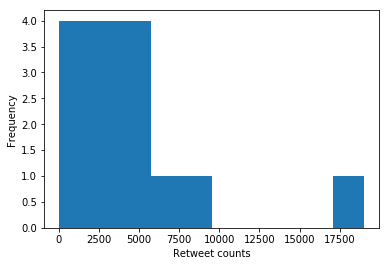

In [50]:
import matplotlib.pyplot as plt
plt.hist(retweet_counts)
plt.xlabel("Retweet counts")
plt.ylabel("Frequency")
plt.show()

### Question 4
Twitter search api provides three modes (check out this [guide](https://dev.twitter.com/rest/reference/get/search/tweets)) for the result_type: mix, recent, and popular. In the previous code, we retrieved the popular tweets. 
Now it is your turn to retrieve recent 100 tweets and assign them to a new variable (e.g., results_recent100), then plot a histogram for the retweet count of the recent 100 tweets. You can follow our example code if you wish. 


**Answer**


[5, 0, 0, 0, 0, 64, 1, 0, 4, 223, 0, 2, 0, 0, 2, 0, 0, 40, 0, 77, 502, 1, 38, 5, 2, 502, 502, 0, 17, 0, 1, 64, 0, 2, 0, 38, 502, 0, 0, 0, 1, 0, 0, 38, 64, 0, 0, 1281, 64, 2, 4, 223, 2185, 0, 47, 0, 4057, 0, 0, 64, 9, 38, 2, 1, 502, 223, 0, 502, 265, 3, 4, 1, 3, 326, 0, 502, 64, 5, 326, 73, 0, 1, 4057, 502, 502, 0, 0, 1, 4, 502, 1, 38, 0, 474, 502, 20, 2, 38, 20, 1030]


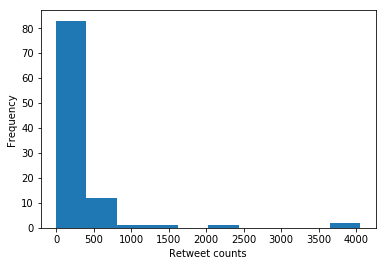

In [40]:
import matplotlib.pyplot as plt
recents = tweepy.Cursor(api.search,   # `api.search` specifies we want to perform a search.
                        q='Berkeley', # `q` is the query, or the words we're searching for.
                        result_type='recent')

results_recent100 = []                  # We start out with an empty list called `first_ten`.
for tweet in recents.items(100): # Then, we'll iterate over the first 10 tweets in `results`...
    results_recent100.append(tweet) 
    
retweet_countz = []                      # We start with an empty list called `retweet_counts`.
for tweet in results_recent100:                  # Then, we iterate over the tweets in `first_ten`...
    retweet_count = tweet.retweet_count  # And, for each tweet, get the number of retweets...
    retweet_countz.append(retweet_count) # And append that number to our list `retweet_counts`.

print(retweet_countz)
plt.hist(retweet_countz)
plt.xlabel("Retweet counts")
plt.ylabel("Frequency")
plt.show()

### Question 5
Compare and contrast between the two histograms for retweet counts of recent and popular 100 tweets that returns from searching the word Berkeley. 

**Answer**: 


In [51]:
#The density of the popular 100 tweet histogram is more spread out over 9000 retweet count units, while for recent 100, we see over 80% of the retweet counts between 0 and 500 retweet counts, so the histogram is higher and skewed right.

## Users
Instead of searching for tweets, you can use Twitter APIs to get details about specific user account. It includes user’s timeline, followers, etc.

Get the latest 10 tweets from an account that interests you (e.g.,  UCBerkeley) twitter account using the following code.

In [52]:
user_results = api.user_timeline(screen_name='UCBerkeley', count=10)

user_results_tweets = []           # We start with an empty list called user_results_tweets

for t in user_results:             #Then, we iterate over the tweets in user_results
    user_results_tweets.append(t)  #And we'll add each of those tweets to user_results_tweets 

In [54]:
#Let's look at one tweet
print(user_results_tweets[0])

Status(_api=<tweepy.api.API object at 0x7ff48442a0f0>, _json={'created_at': 'Tue Sep 19 02:09:13 +0000 2017', 'id': 909962554340003841, 'id_str': '909962554340003841', 'text': 'RT @UCBerkeleyNews: Mary-Claire King was a @UCBerkeley prof when her husband left her &amp; burglars tore apart her home; read her story https:…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'UCBerkeleyNews', 'name': 'UC Berkeley News', 'id': 30275911, 'id_str': '30275911', 'indices': [3, 18]}, {'screen_name': 'UCBerkeley', 'name': 'UC Berkeley', 'id': 176932593, 'id_str': '176932593', 'indices': [43, 54]}], 'urls': []}, 'source': '<a href="http://bufferapp.com" rel="nofollow">Buffer</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 176932593, 'id_str': '176932593', 'name': 'UC Berkeley', 'screen_name': 'UCBerkeley', 'location': 

In [55]:
#print the text of the first 10 tweets
for tweet in user_results_tweets:
    print(tweet.created_at.strftime("%Y-%b-%d %H:%M"))
    print(tweet.text)
    print()

2017-Sep-19 02:09
RT @UCBerkeleyNews: Mary-Claire King was a @UCBerkeley prof when her husband left her &amp; burglars tore apart her home; read her story https:…

2017-Sep-19 01:42
RT @brklyartsdesign: Tonight Arlie Hochschild discusses her book 'Strangers in their own land' with performances  by @UCBerkeley students #…

2017-Sep-19 01:03
RT @BerkeleyLawNews: Dean Chemerinsky &amp; @Harvard_Law Lawrence Tribe @tribelaw join suit vs Trump on behalf of #DACA recipients https://t.co…

2017-Sep-19 00:04
RT @GreaterGoodSC: Find your unique road to happiness with The Science of Happiness--a free course from UC Berkeley https://t.co/Kb2WfRLkQu

2017-Sep-18 22:15
BLOG by @profjohnapowell https://t.co/9LeHPyMIMk #freespeech

2017-Sep-18 22:04
RT @CalFootball: Congrats @aaronrodgers12 #ProBears https://t.co/S7WEm6I1LR

2017-Sep-18 19:02
RT @UCBerkeley: Join the #freespeech conversation! https://t.co/CyqQPk1uNy

2017-Sep-18 18:24
Join the #freespeech conversation! https://t.co/CyqQPk1uNy

2017-S

### Question 6

Look at the text of retrieved tweets and compare them to the latest 10 tweets of the [web interface](https://twitter.com/UCBerkeley) for the same user. Do you see any difference? 

Twitter has a "pinned tweet" that doesn't appear on our list of retrieved tweets, for the rest of the tweets are the same as the ones on Twitter right now, in the same order.


Get a list of a followers for UCBerkeley.

In [66]:
followers_list = []

followers_results = api.followers(screen_name='UCBerkeley', count=200, page=1)
for f in followers_results:
      followers_list.append(f)

for f in followers_list:
    print(f.name)

MD
Felipe Abreo
Checho Waldo
Scott Hyman
Corpus VEC Fellow
4r4d
Danielson
Nicole Hashemi
Nikolai Kirienko
Karime Sánchez G
Michelle Chang
Lisa Cremer
driss naciri
WET_edugames
Anne Megaro
Barbora Sedova
JustinBathory
UN Human Rights
Tina Noordeh
ryan underwood
Jimmy Song
Zach Kemp
Kazuki (コジコジ)
College Town Baby
Alix
Mete
Aastik SajanRambooti
Feuilliton
Roz Plater
Nils
d
Fishers
Lucy in the sky
Anna Carolyan
Gerlen Anderson
Usha
İsmailİsmailovOzturk
Daniel Lacalle
NIOSHbreathe
Marta C. Gonzalez
DASCS3
William Blacoe
Susanne Milde
• » ιѕнαη gσєℓ « •
M. Ferhat Aktaş
K
sydney
Kooz
Subhash Thapa
Clayton Wyrick
qixiong
Andy Iyengar
Abhilash Kumar
furkan#inc
Wil Tang
Jhoya
Gabriel Rocha
melissa monroy
HairuAn
Higvhh
vizzz
Mohammed Shuaib
Wen-Jia Wu
Suhail Kandak
Dreammaker
Nick Aparicio
autumn ((:
Farah
Nicolás Quiñones
dani.🌹
gráinne b
abraham velasquez
ems
Jsnsndndnnnf
SpaceDreams_1
Victor
holly
Joanne Shin
Michael Paque
H. Castle
Daniel RF
Doc
Jessica Chen
GE Ausbon
신미진
Andres Tassara
Ver

There’s a limit on how many users can be returned by one request. If you need more, please read [using cursors to navigate collections](https://dev.twitter.com/overview/api/cursoring).

### Extra Credit Question 
We saw how to use Twitter API to search for tweets. The [Search API](https://dev.twitter.com/rest/public/search) has an option to filter the query results by geo location. The parameter value is specified by ”latitude,longitude,radius” (check out the documentation of API  for more information). Compare the top 10 popular tweets text that contain the word 'berkeley' from four geo locations: Berkeley, Kansas City, New York, and Barcelona Spain.


**Answer:**

TweepError: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)

### Extra Credit Question
Based on profile_location in the follower data, Compare between the followers of Donald Trump and Hillary Clinton in terms of their locations. Draw a map for both followers lists. 

**Answer:**

### Submitting the assignment

- Delete your Twitter API credentials, ie. re-assign `consumer_key`, `consumer_secret`, `access_key`, and `access_secret` to empty strings so that we won't see your credentials when you save and sumbit it.
- Save this jupyter notebook as a pdf. Click File, Download as, PDF via LaTex (.pdf).
- Upload the pdf file into bcourses under Assignment 2.